# Prediction of Significant Wave Height using supervised ML models

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [33]:
#reading CSV files
df1 = pd.read_csv("C://Users/Welcome/Downloads/training_data.csv")
df2 = pd.read_csv("C://Users/Welcome/Downloads/testing_data.csv")

In [42]:
#first five rows of the data
df1.head(5)

,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),WVHT(m),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC)
0,2017,4,24,1,50,23,3.0,3.6,0.39,4.17,3.33,349,1019.1,4.7,5.1,4.2
1,2017,4,24,2,50,30,2.9,3.3,0.65,5.26,4.21,358,1018.8,4.6,4.8,4.1
2,2017,4,24,3,50,360,2.2,2.5,0.90,5.88,4.79,11,1018.3,4.6,4.7,4.2
3,2017,4,24,4,50,355,2.5,3.1,0.91,5.88,4.95,23,1018.1,4.6,4.6,4.2
4,2017,4,24,5,50,355,3.5,4.5,0.88,6.25,4.98,26,1018.3,4.5,4.6,4.0


In [38]:
df2.head()

,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),WVHT(m),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC)
0,2019,7,2,22,40,340,6.7,8.2,0.26,2.35,2.37,177,1011.5,18.6,16.8,17.8
1,2019,7,2,23,40,15,2.3,5.5,0.27,2.60,2.44,336,1010.7,19.0,16.9,17.8
2,2019,7,3,1,40,11,1.6,2.7,0.30,3.13,2.95,341,1010.6,17.9,16.7,17.3
3,2019,7,6,10,40,21,4.1,4.9,0.27,2.86,2.59,8,1015.8,20.0,20.3,19.5
4,2019,7,6,11,40,16,4.5,5.4,0.26,2.74,2.64,16,1016.5,20.1,20.3,19.6


<AxesSubplot:>

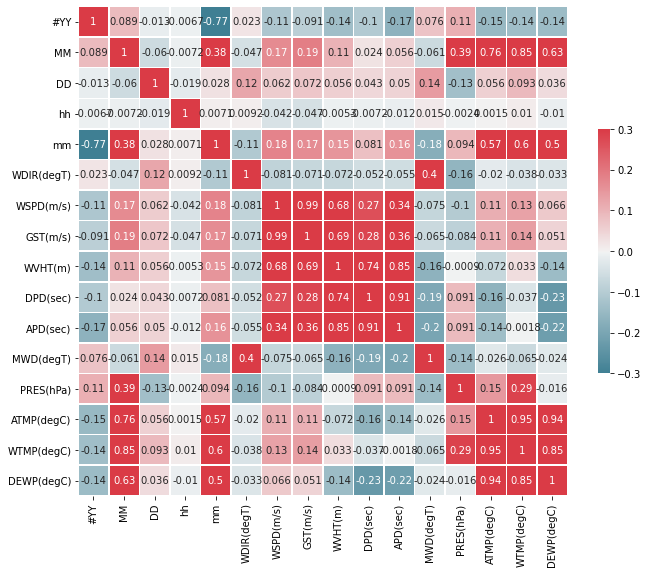

In [134]:
#correlation between the features
corr = df1.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,          
    cmap=cmap,     
    annot=True,    
    vmax=.3,       
    vmin=-.3,      
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}  
)

### As we can see the wind speed is highly correlated with the sigificant wave height

In [43]:
wspd_6 = []
wspd_5 = []
wspd_4 = []
wspd_3 = []
wspd_2 = []
wspd_1 = []
wspd = []
swht =[]
for i in range(6,len(df1)):
    wspd_6.append(df1['WSPD(m/s)'][i-6])
    wspd_5.append(df1['WSPD(m/s)'][i-5])
    wspd_4.append(df1['WSPD(m/s)'][i-4])
    wspd_3.append(df1['WSPD(m/s)'][i-3])
    wspd_2.append(df1['WSPD(m/s)'][i-2])
    wspd_1.append(df1['WSPD(m/s)'][i-1])
    wspd.append(df1['WSPD(m/s)'][i])
    swht.append(df1['WVHT(m)'][i])
data = {'wspd_6':wspd_6,'wspd_5':wspd_5,'wspd_4':wspd_4,'wspd_3':wspd_3,'wspd_2':wspd_2,'wspd_1':wspd_1,'wspd':wspd,'swht':swht}
training = pd.DataFrame(data)
training.head()

,wspd_6,wspd_5,wspd_4,wspd_3,wspd_2,wspd_1,wspd,swht
0,3.0,2.9,2.2,2.5,3.5,2.6,1.7,0.80
1,2.9,2.2,2.5,3.5,2.6,1.7,1.3,0.75
2,2.2,2.5,3.5,2.6,1.7,1.3,2.3,0.83
3,2.5,3.5,2.6,1.7,1.3,2.3,3.4,0.69
4,3.5,2.6,1.7,1.3,2.3,3.4,3.7,0.59


### Inputs to the ML models are current wind speed and those wind speeds belonging to the previous hours. here the previous six hours has taken 

In [44]:
training.to_csv('training.csv')

In [45]:
wspd_6 = []
wspd_5 = []
wspd_4 = []
wspd_3 = []
wspd_2 = []
wspd_1 = []
wspd = []
swht =[]
for i in range(6,len(df2)):
    wspd_6.append(df2['WSPD(m/s)'][i-6])
    wspd_5.append(df2['WSPD(m/s)'][i-5])
    wspd_4.append(df2['WSPD(m/s)'][i-4])
    wspd_3.append(df2['WSPD(m/s)'][i-3])
    wspd_2.append(df2['WSPD(m/s)'][i-2])
    wspd_1.append(df2['WSPD(m/s)'][i-1])
    wspd.append(df2['WSPD(m/s)'][i])
    swht.append(df2['WVHT(m)'][i])
data = {'wspd_6':wspd_6,'wspd_5':wspd_5,'wspd_4':wspd_4,'wspd_3':wspd_3,'wspd_2':wspd_2,'wspd_1':wspd_1,'wspd':wspd,'swht':swht}
testing = pd.DataFrame(data)
testing.head()

,wspd_6,wspd_5,wspd_4,wspd_3,wspd_2,wspd_1,wspd,swht
0,6.7,2.3,1.6,4.1,4.5,3.8,4.5,0.27
1,2.3,1.6,4.1,4.5,3.8,4.5,5.5,0.30
2,1.6,4.1,4.5,3.8,4.5,5.5,5.7,0.35
3,4.1,4.5,3.8,4.5,5.5,5.7,7.4,0.46
4,4.5,3.8,4.5,5.5,5.7,7.4,8.8,0.70


In [46]:
testing.to_csv('testing.csv')

In [136]:
corr1 = training.corr()
corr1

,wspd_6,wspd_5,wspd_4,wspd_3,wspd_2,wspd_1,wspd,swht
wspd_6,1.000000,0.816555,0.688664,0.599243,0.542090,0.485217,0.433501,0.638840
wspd_5,0.816555,1.000000,0.816129,0.688590,0.599149,0.542020,0.484972,0.679055
wspd_4,0.688664,0.816129,1.000000,0.815519,0.687733,0.598752,0.541779,0.714573
wspd_3,0.599243,0.688590,0.815519,1.000000,0.815485,0.687685,0.598438,0.743009
wspd_2,0.542090,0.599149,0.687733,0.815485,1.000000,0.815402,0.687296,0.758606
wspd_1,0.485217,0.542020,0.598752,0.687685,0.815402,1.000000,0.815302,0.746079
wspd,0.433501,0.484972,0.541779,0.598438,0.687296,0.815302,1.000000,0.678508
swht,0.638840,0.679055,0.714573,0.743009,0.758606,0.746079,0.678508,1.000000


<AxesSubplot:>

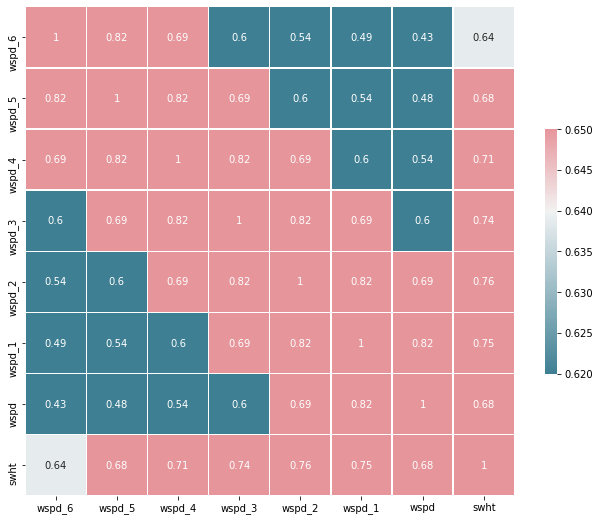

In [140]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr1,          
    cmap=cmap,     
    annot=True,    
    vmax=.65,       
    vmin=.62,      
    center=.64,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}  
)

### Above heatmap shows how wind speeds of previous hours correlates to the specific wave height

In [50]:
training.columns

Index(['wspd_6', 'wspd_5', 'wspd_4', 'wspd_3', 'wspd_2', 'wspd_1', 'wspd',
       'swht'],
      dtype='object')

In [51]:
features = ['wspd_6', 'wspd_5', 'wspd_4', 'wspd_3', 'wspd_2', 'wspd_1', 'wspd']
x = training[features].values
y = training['swht'].values

In [54]:
#train test split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

#applying random forest regressor algorithm
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
rf = regressor.fit(x_train, y_train)
predict = rf.predict(x_test)
r2 = r2_score(predict,y_test)
r2

0.7635639313042191

In [56]:
bias = mean(predict)-mean(y_test)
bias

0.0005685996563574713

In [57]:
#Root Mean Squared Error
RMSE = np.sqrt(mean_squared_error(y_test, predict))
RMSE

0.1651580510143618

In [58]:
#scattered index
SI = RMSE*100/mean(y_test)
SI

25.740295554818456

In [59]:
#coefficient of corelation
R,_ = pearsonr(predict,y_test)
R

0.8993507878688942

In [110]:
X = testing[features].values
Y = testing['swht'].values
#applying rf to the test data
k = rf.predict(X)

# evaulation metrics
print('bias', '=', mean(k)-mean(Y))
print('RMSE', '=', np.sqrt(mean_squared_error(Y, k)))
print('SI', '=', np.sqrt(mean_squared_error(Y, k))*100/mean(Y))
print('R','=', pearsonr(k,Y))

bias = -0.0029721824104234074
RMSE = 0.16001442672133556
SI = 22.915078648472786
R = (0.9016241358159823, 0.0)


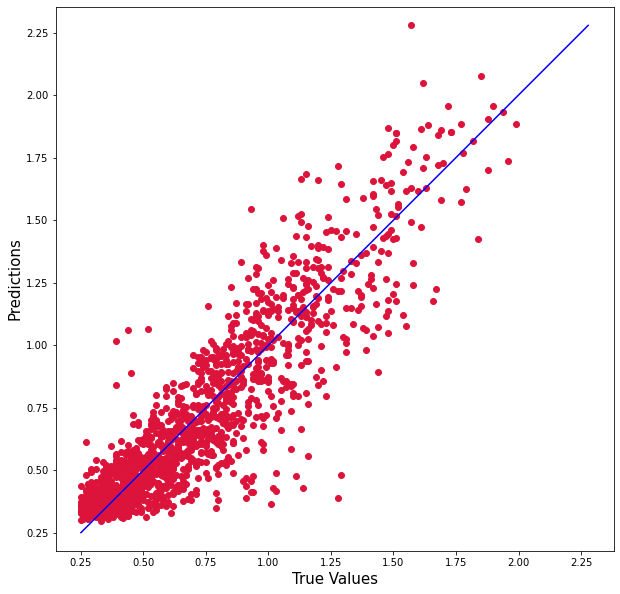

In [111]:
plt.figure(figsize=(10,10))
plt.scatter(Y, k, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(k), max(Y))
p2 = min(min(k), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

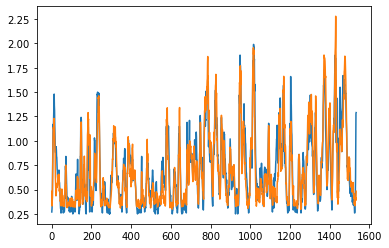

In [112]:
#True values vs Predicted values
fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(k)

###### 

### SVM(RBF Kernal)

In [113]:
#applying Support Vector Machine Regressor algorithm with Radial Basis Kernal function
svr_rbf = SVR(kernel='rbf',gamma=0.01, C=100.0, epsilon=0.001)
svr_rbf.fit(x_train,y_train)
K = svr_rbf.predict(x_test)

In [114]:
print('bias', '=', mean(K)-mean(y_test))
print('RMSE', '=', np.sqrt(mean_squared_error(y_test, K)))
print('SI', '=', np.sqrt(mean_squared_error(y_test, K))*100/mean(y_test))
print('R','=', pearsonr(K,y_test))

bias = -0.018564944990802856
RMSE = 0.17946282524326712
SI = 27.96973041576238
R = (0.885006257425796, 0.0)


In [115]:
predict = svr_rbf.predict(X)
print('bias', '=', mean(predict)-mean(Y))
print('RMSE', '=', np.sqrt(mean_squared_error(Y, predict)))
print('SI', '=', np.sqrt(mean_squared_error(Y, predict))*100/mean(Y))
print('R','=', pearsonr(predict,Y))

bias = -0.01740251692504302
RMSE = 0.18768184959022524
SI = 26.87722871226217
R = (0.8773110795420448, 0.0)


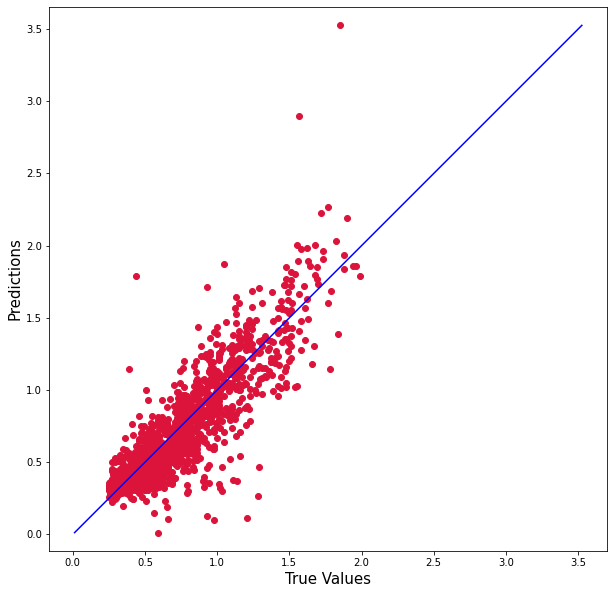

In [116]:
plt.figure(figsize=(10,10))
plt.scatter(Y, predict, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predict), max(Y))
p2 = min(min(predict), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

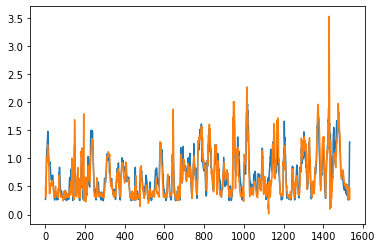

In [117]:
fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(predict)

###### 

### SVM(Polynomial Kernal)

In [118]:
svr_poly_1 = SVR(kernel='poly',degree=1.0, C=100.0, epsilon=0.001)
svr_poly_1.fit(x_train,y_train)
P = svr_poly_1.predict(x_test)

In [119]:
print('bias', '=', mean(P)-mean(y_test))
print('RMSE', '=', np.sqrt(mean_squared_error(y_test, P)))
print('SI', '=', np.sqrt(mean_squared_error(y_test, P))*100/mean(y_test))
print('R','=', pearsonr(P,y_test))

bias = -0.023340674154262775
RMSE = 0.2066115999958291
SI = 32.20093490013457
R = (0.8420545806341178, 8.262035643e-314)


In [128]:
Predict1 = svr_poly_1.predict(X)
print('bias', '=', mean(Predict1)-mean(Y))
print('RMSE', '=', np.sqrt(mean_squared_error(Y, Predict1)))
print('SI', '=', np.sqrt(mean_squared_error(Y, Predict1))*100/mean(Y))
print('R','=', pearsonr(Predict1,Y))

bias = -0.031182924590180128
RMSE = 0.16734165797905892
SI = 23.964384539114025
R = (0.8877036369958686, 0.0)


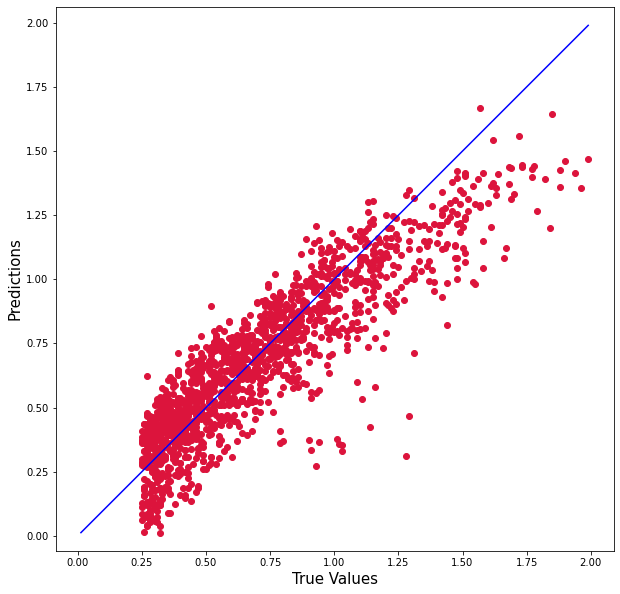

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(Y, Predict1, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Predict1), max(Y))
p2 = min(min(Predict1), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

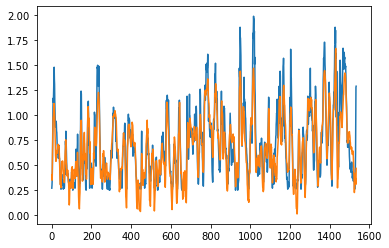

In [130]:
fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(Predict1)

# 

### polynomial kernel with degree 2

In [122]:
svr_poly_2 = SVR(kernel='poly',degree=2.0, C=100.0, epsilon=0.001)
svr_poly_2.fit(x_train,y_train)
P = svr_poly_2.predict(x_test)

In [123]:
print('bias', '=', mean(P)-mean(y_test))
print('RMSE', '=', np.sqrt(mean_squared_error(y_test, P)))
print('SI', '=', np.sqrt(mean_squared_error(y_test, P))*100/mean(y_test))
print('R','=', pearsonr(P,y_test))

bias = -0.021717559926385133
RMSE = 0.17067294433879143
SI = 26.599805480324726
R = (0.8946324254177587, 0.0)


In [124]:
Predict = svr_poly_2.predict(X)
print('bias', '=', mean(Predict)-mean(Y))
print('RMSE', '=', np.sqrt(mean_squared_error(Y, Predict)))
print('SI', '=', np.sqrt(mean_squared_error(Y, Predict))*100/mean(Y))
print('R','=', pearsonr(Predict,Y))

bias = -0.02282105797202094
RMSE = 0.15422268219414292
SI = 22.085664175841455
R = (0.9062830329039557, 0.0)


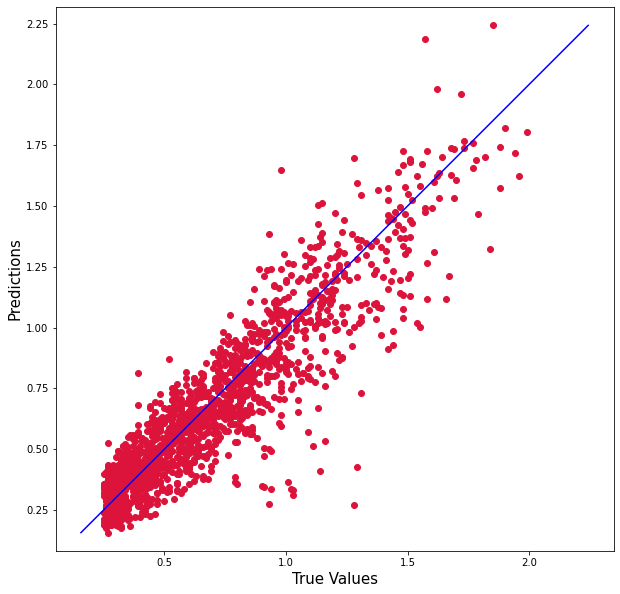

In [125]:
plt.figure(figsize=(10,10))
plt.scatter(Y, Predict, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Predict), max(Y))
p2 = min(min(Predict), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

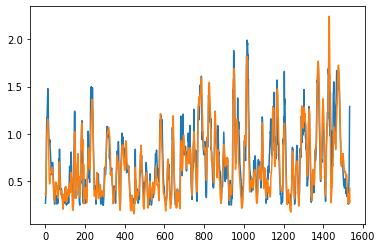

In [127]:
fig, ax = plt.subplots()
ax.plot(Y)
ax.plot(Predict)

In [2]:
training = pd.read_csv("C://Users/Welcome/Downloads/training.csv")
testing = pd.read_csv("C://Users/Welcome/Downloads/testing.csv")

In [11]:
bias = []
rmse = []
si = []
r = []

In [12]:
features = ['wspd_6', 'wspd_5', 'wspd_4', 'wspd_3', 'wspd_2', 'wspd_1', 'wspd']
x = training[features].values
y = training['swht'].values
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
rf = regressor.fit(x_train, y_train)
predict = rf.predict(x_test)
X = testing[features].values
Y = testing['swht'].values
k = rf.predict(X)
bias.append(mean(k)-mean(Y))
rmse.append(np.sqrt(mean_squared_error(Y, k)))
si.append(np.sqrt(mean_squared_error(Y, k))*100/mean(Y))
r.append((pearsonr(k,Y))[0])

In [13]:
svr_rbf = SVR(kernel='rbf',gamma=0.01, C=50.0, epsilon=0.001)
svr_rbf.fit(x_train,y_train)
k = svr_rbf.predict(X)
bias.append(mean(k)-mean(Y))
rmse.append(np.sqrt(mean_squared_error(Y, k)))
si.append(np.sqrt(mean_squared_error(Y, k))*100/mean(Y))
r.append((pearsonr(k,Y))[0])

In [14]:
svr_poly_1 = SVR(kernel='poly',degree=1.0, C=50.0, epsilon=0.001)
svr_poly_1.fit(x_train,y_train)
k = svr_poly_1.predict(X)
bias.append(mean(k)-mean(Y))
rmse.append(np.sqrt(mean_squared_error(Y, k)))
si.append(np.sqrt(mean_squared_error(Y, k))*100/mean(Y))
r.append((pearsonr(k,Y))[0])

In [16]:
svr_poly_2 = SVR(kernel='poly',degree=2.0, C=50.0, epsilon=0.001)
svr_poly_2.fit(x_train,y_train)
k = svr_poly_2.predict(X)
bias.append(mean(k)-mean(Y))
rmse.append(np.sqrt(mean_squared_error(Y, k)))
si.append(np.sqrt(mean_squared_error(Y, k))*100/mean(Y))
r.append((pearsonr(k,Y))[0])

In [17]:
C = ['RF','SVM RBF kernel','SVM liner kernel','SVM quadratic kernel']

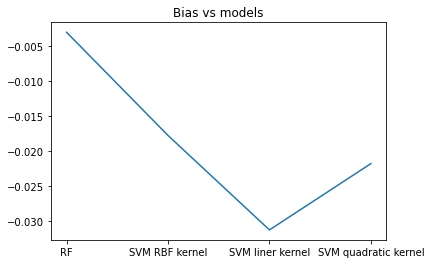

In [25]:
plt.plot(bias)
plt.title('Bias vs models')
plt.xticks([0,1,2,3],C)
plt.show()

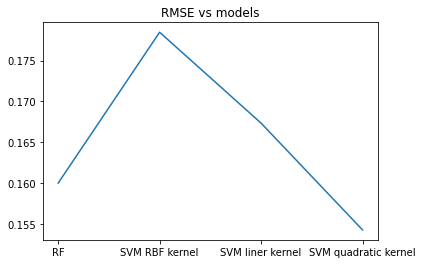

In [26]:
plt.plot(rmse)
plt.title('RMSE vs models')
plt.xticks([0,1,2,3],C)
plt.show()

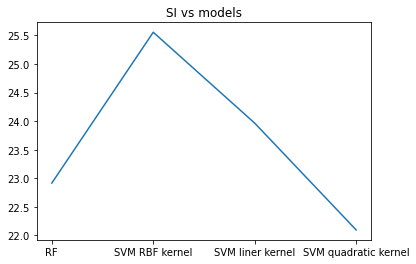

In [27]:
plt.plot(si)
plt.title('SI vs models')
plt.xticks([0,1,2,3],C)
plt.show()

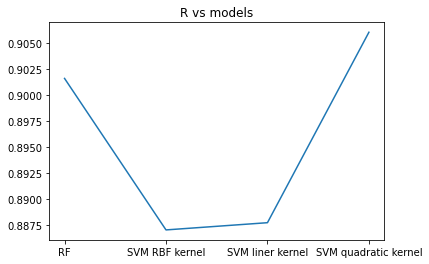

In [28]:
plt.plot(r)
plt.title('R vs models')
plt.xticks([0,1,2,3],C)
plt.show()

In [29]:
bias

[-0.0029721824104234074,
 -0.01774782023627941,
 -0.0312740224732172,
 -0.021778945167653885]

In [30]:
rmse

[0.16001442672133556,
 0.17846040388151282,
 0.16734881431010998,
 0.15428960900286087]

In [32]:
si

[22.915078648472786, 25.556659323629717, 23.965409371013436, 22.0952485184341]

In [33]:
r

[0.9016241358159823, 0.8870284869929403, 0.8877240748254558, 0.90607294058983]